# An Introduction to Ethical Supervised Learning - Solution Manual

<hr/>

## Overview:
- Measuring performance of supervised learning predictors that are:
    - classification problems
    - binary predictors
- Introduction to non-discriminatory supervised learning predictors
- Charting performance of a TransRisk score case study to determine if it passes as non-discriminatory

<hr/>

## Part 1: Measuring Performance on Binary Classifiers
While are many ways to calculate the performance of a binary predictor, two methods are particularly useful for fairness models:
<ul>
<li><i>Sensitivity</i>:
<br/> - True Positive Rate
<br/> - Among all of the actual 1's, what percentage did we predict were 1?
</li>
<li><i>Specificity</i>:
<br/> - True Negative Rate
<br/> - Among all of the actual 0's, what percentage did we predict were 0?
</li>
</ul>

<hr/>

## Part 2: A Brief Introduction to Non-Discriminatory Machine Learning Predictors
For companies that use classification based predictors, sometimes the predicted outcome of individuals within a group will fully influence the decision that is made for that individual. This needs to be treated particularly carefully when the decision being made is an <i>Important Benefit</i> - ie) health care, loan approval, or college admission. What if the data that is being used to train the model is inherently discriminatory? What if factors that created the data we use was inherently discriminatory and we didn't even know? Then the outcome predicted would also be discriminatory.<br/><br/>
This is what non-discriminatory predictors seek to solve. For example, <b>The Equal Opportunity Model</b> requires that the true positive rate for all groups in a dataset to be the same in order to achieve fairness. What does this mean in terms of performance for binary classifiers? (Write in terms of 1's an 0's below)

<hr/>

## Part 2: A Brief Introduction to Non-Discriminatory Machine Learning Predictors
For companies that use classification based predictors, sometimes the predicted outcome of individuals within a group will fully influence the decision that is made for that individual. This needs to be treated particularly carefully when the decision being made is a <i>Social Benefit</i> - ie) health care, loan approval, or college admission. What if the data that is being used to train the model is inherently discriminatory? What if factors that created the data we use was inherently discriminatory and we didn't even know? Then the outcome predicted would also be discriminatory.<br/><br/>
This is what non-discriminatory predictors seek to solve. While there are many models to use, we will be focusing on <b>The Equal Opportunity Model</b>. This means, for each group - the true positive rate is the same. What does this mean in terms of performance for binary classifiers? (Write in terms of 1's an 0's below)

** Write Answer Here: **

<hr/>

## Part 3: Introducing the TransRisk Dataset
For this part of the tutorial, we will be working with a dataset that represents the distribution of TransRisk scores for non-defaulters (people who have previously paid off their loans on time) against four main demographic groups: Asian, Hispanic, Black, and White. Go ahead and import this data to take a look. What collected information to create TransRisk scores could be inherently discriminatory?

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
totalData = pd.read_csv("ShortenedData.csv")
totalData.head()

,TransRisk Score,Demographic,Good,Bad
0,20,white,2.937317,33.903415
1,40,white,16.767500,75.331500
2,60,white,42.716500,93.436250
3,80,white,68.186316,98.261842
4,100,white,91.210769,99.636667


For loan approval, usually a bank will set a <b>threshold TransRisk score</b> that determines who is approved and who is denied. For example, if the threshold was 60: everyone with a TransRisk score below 60 would be denied the loan, and everyone with a TransRisk score above 60 would be approved a loan.
<br/><br/>
How should a predictor go about deciding who should get a loan and who should not? It makes sense to say all of the people who <i>deserve</i> a loan should receive one. In the case of the TransRisk score, the group of people who <i>deserve</i> a loan would be the non-defaulters. 
<br/><br/>
Following this logic, in theory the probability of a non-defaulter getting a loan ($\hat Y$ = 1) at any threshold TransRisk score should be the same amongst all four groups. Finish the function below to plot the distribution of non-defaulters from one group getting ($\hat Y$ = 1) based on a threshold value of TransRisk scores. Then, get the probabilities for all four demographic groups and plot them on top of eachother.

In [3]:
def getGraphData(dataset, graphType):
    i= 0
    x = []
    y = []
    while(i < 100.5):
        # our dataset doesn't include these scores so this line is necessary
        if(i == 72.5 or i == 77.5 or i == 92.5):
            i = (i + 0.5)
        # create and append the x and y values to the x and y arrays to be returned for the plot here:
        curr_race_non_default = dataset[dataset["TransRisk Score"] >= i]["Good"].sum()
        total_race_non_default = dataset["Good"].sum()
        yVal = curr_race_non_default / total_race_non_default
        x.append(i)
        y.append(yVal)
        i = (i + 0.5)
    plt.plot(x, y, graphType)

In [4]:
white_non_default = totalData[["TransRisk Score", "Demographic", "Good"]][totalData["Demographic"] == "white"]
asian_non_default = totalData[["TransRisk Score", "Demographic", "Good"]][totalData["Demographic"] == "asian"]
black_non_default = totalData[["TransRisk Score", "Demographic", "Good"]][totalData["Demographic"] == "black"]
hispanic_non_default = totalData[["TransRisk Score", "Demographic", "Good"]][totalData["Demographic"] == "hispanic"]

** Plot Graph Below **

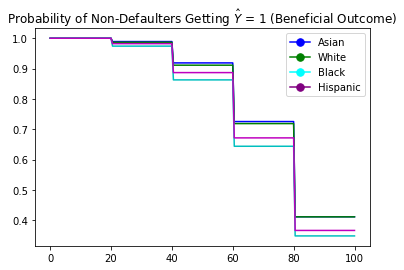

In [5]:
getGraphData(asian_non_default, 'b-')
getGraphData(white_non_default, 'g-')
getGraphData(black_non_default, 'c-')
getGraphData(hispanic_non_default, 'm-')
plt.title("Probability of Non-Defaulters Getting $\hat Y$ = 1 (Beneficial Outcome)" )

blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Asian')
green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='White')
cyan_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Black')
purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Hispanic')

plt.legend(handles=[blue_line, green_line, cyan_line, purple_line])

<hr/>

##  Calculating Performance
Now that we've seen the likelihood of non-defaulting individuals from each of the four demographic groups to be approved a loan based on threshold value, let's check the performance of this model. Take a look at the original data again.

In [6]:
whites = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "white"]
asians = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "asian"]
blacks = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "black"]
hispanics = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "hispanic"]

In [7]:
whites.set_index("TransRisk Score", inplace=True)
asians.set_index("TransRisk Score", inplace=True)
blacks.set_index("TransRisk Score", inplace=True)
hispanics.set_index("TransRisk Score", inplace=True)

** Complete : Calculate the following problem for both the White and Black demographic groups with a threshold TransRisk score of 60**

For all of the individuals that <i>deserve</i> a loan, how many will receive one?

In [8]:
totalGood = whites["Good"].sum()
tp = whites["Good"].loc[60:].sum()
white_sensitivity = tp / totalGood
totalGood = blacks["Good"].sum()
tp = blacks["Good"].loc[60:].sum()
black_sensitivity = tp / totalGood
white_sensitivity, black_sensitivity

(0.9111668964918768, 0.8627077847437454)

<hr/>

### Analysis: 

What you just calculated is the <b>sensitivity</b> of the White and Black demographic groups for a single threshold value (60). If you recall from the beginning of this tutorial, for the Equalized Opportunity fairness model the main requirement for achieving fairness is to ensure that recall/sensitivity is the same for all groups. As we saw in our plot from Part 3, Equalized Opportunity was definitely not being satisfied. So, how might we go about finding an easy solution to this problem? The answer lies in utilizing this performance metric. To satisfy the requirement, we simply need to find the intersection point where all groups have the same sensitivity.

<b> Create a plot representing the sensitivity and TransRisk scores in order to see the intersection point where all demographic groups have the same sensitivity</b>

In [9]:
import numpy as np

In [10]:
def getSensitivityDF(demographic, data):
    scores = []
    percent_default = []
    totalGood = data["Good"].sum()    
    sensitivitySeries = []
    for index, row in data.iterrows():
        currTP = data["Good"].loc[index:].sum()
        sensitivitySeries.append(currTP / totalGood)
        scores.append(index)
        percent_default.append((data.loc[index]["Bad"].sum()) / ((data.loc[index]["Good"].sum()) + (data.loc[index]["Bad"].sum())) * 100)
    sensitivitySeries = pd.Series(sensitivitySeries)
    scoresSeries = pd.Series(scores)
    percent_default = pd.Series(percent_default)
    df = pd.DataFrame({ 'Score' : scoresSeries,
    'Demographic' : np.full(len(scoresSeries), demographic),
    'Sensitivity' : sensitivitySeries,
    'Percent_Default': percent_default})
    return df

In [11]:
white_sensitivity = getSensitivityDF("white", whites)
asian_sensitivity = getSensitivityDF("asian", asians)
black_sensitivity = getSensitivityDF("black", blacks)
hispanic_sensitivity = getSensitivityDF("hispanic", hispanics)

In [18]:
sensitivity = pd.concat([white_sensitivity, 
          asian_sensitivity, 
          black_sensitivity, 
          hispanic_sensitivity], axis=0)

In [20]:
sensitivity

,Demographic,Percent_Default,Score,Sensitivity
0,white,92.026985,20,1.000000
1,white,81.794048,40,0.986758
2,white,68.626047,60,0.911167
3,white,59.034503,80,0.718593
4,white,52.207496,100,0.411196
0,asian,93.070208,20,1.000000
1,asian,82.266645,40,0.989079
2,asian,68.533590,60,0.918696
3,asian,58.495419,80,0.725331
4,asian,52.108806,100,0.411493


In [21]:
sensitivity["Percent_Default"] < 20

0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
Name: Percent_Default, dtype: bool

In [14]:
## Here is where I'm confused for two reasons:
## First, it doesn't seem like there is a point where all of the sensitivities are the same that isn't close
## to 0 or 1.0 for the TransRisk score
## And second, it doesn't seem like there is a percent_default anywhere below 50% even though theoretically
## we are supposed to choose the sensitivity at 18% defaulting (unless I am calculating % default wrong)

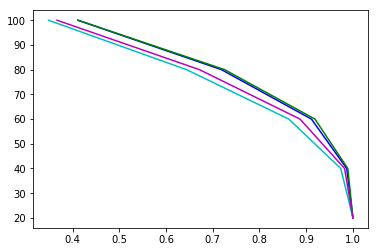

In [15]:
plt.plot(white_sensitivity["Sensitivity"], white_sensitivity["Score"], 'b-')
plt.plot(asian_sensitivity["Sensitivity"], asian_sensitivity["Score"], 'g-')
plt.plot(black_sensitivity["Sensitivity"], black_sensitivity["Score"], 'c-')
plt.plot(hispanic_sensitivity["Sensitivity"], hispanic_sensitivity["Score"], 'm-')

*** OLD STUFF FROM PREVIOUS VERSIONS OF THE TUTORIAL ***

## Next Steps:

Now that you have calculated the precision and recall of a single threshold, let's calculate it for every TransRisk score threshold. Create a pandas dataframe that includes all four groups (defaulting and non-defaulting) and TransRisk scores. With each score acting as the <i>threshold</i> value, for each group - determine the F1 score for that threshold. Are there any significant discrepancies you notice between groups?

In [16]:
def getPrecisionSeries(goodName, badName, dataArray):
    tp = dataArray[goodName]
    fp = dataArray[badName]
    precision = tp / (tp + fp)
    return precision

In [17]:
def getRecallSeries(goodName, badName, dataArray):
    totalGood = totalData[goodName].sum()
    tp = dataArray[goodName]
    recall = tp / totalGood
    return recall

In [18]:
def getF1Series(goodName, badName, dataArray):
    precision = getPrecisionSeries(goodName, badName, dataArray)
    recall = getRecallSeries(goodName, badName, dataArray)
    denom = ((1/precision) + (1/recall)) / 2
    f1 = 1/denom
    return f1

In [19]:
F1Scores = totalData["Score"].to_frame(name="TransRisk Score")
white_series = getF1Series("Non- Hispanic white (Good)", "Non- Hispanic white (Bad)", totalData)
asian_series = getF1Series("Asian (Good)", "Asian (Bad)", totalData)
black_series = getF1Series("Black (Good)", "Black (Bad)", totalData)
hispanic_series = getF1Series("Hispanic (Good)", "Hispanic (Bad)", totalData)
F1Scores['White F1'] = white_series
F1Scores['Asian F1'] = asian_series
F1Scores['Black F1'] = black_series
F1Scores['Hispanic F1'] = hispanic_series
F1Scores.head()

KeyError: 'Score'

In [ ]:
test_df = F1Scores.copy()
test_df = test_df.set_index("TransRisk Score")
cols = test_df.columns[:]
cols = [col.replace(" F1", "") for col in cols]
test_df.columns = cols
test_df = pd.DataFrame(test_df.stack(), columns = ["F1"])

test_df = test_df.reset_index()
test_df.columns = ["TransRisk Score", "Demographic", "F1"]
test_df = test_df.set_index(["TransRisk Score", "Demographic"])
test_df.loc[4.5, "White"]

In [ ]:
## Still trying to fix this to get the F1 Score Panda Array looking good
F1Scores.set_index(score) and melt df if choose to do this, so that demographic F1s become column

<hr/>
## Conclusion

As our research shows, it is very obvious that the data involved in creating the supervised learning predictors for loan approval from TransRisk scores is inherently discriminatory. What are some other possible solutions for optimizing performance of these models to ensure non-discriminatory decision making? 
<br/><br/>
TransRisk data and non-discriminatory analysis courtesy of https://arxiv.org/pdf/1610.02413.pdf